In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import torchvision
import torch
from torch import nn

%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path

import pickle
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [30]:
b = 4
t = 11
first_blow = 6
embd_size = 13

softer = nn.Sequential(
    nn.Conv1d(1, first_blow, kernel_size=1, stride=1),
    nn.LeakyReLU(inplace=True),
    nn.Conv1d(first_blow, embd_size, kernel_size=1, stride=1, bias=False),
)

idx = torch.rand(b, t)

In [33]:
def get_figsize(n_rows, n_cols):
    row_size = 8  # heigth
    column_size = 20  # width

    return (n_cols * column_size, n_rows * row_size)


def get_figa(n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=get_figsize(n_rows, n_cols))
    return fig, ax

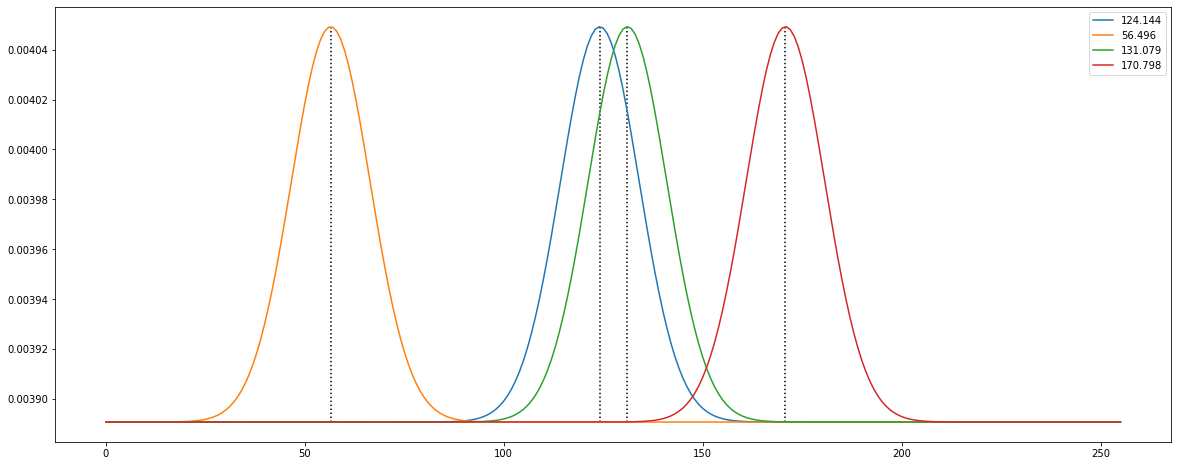

In [60]:
n_soft_classes = 256


def normal(mu, sigma):
    def _f(x):
      return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    return _f

  
def soft_quant(classes, sigma):
    def _f(x):
        N = normal(x, sigma)
        vector = [
            N(b)
            for b in range(classes)
        ]
        return softmax(vector)
    return _f
  

s = soft_quant(n_soft_classes, sigma=10)
basis = list(range(n_soft_classes))

fig, axis = get_figa(1, 1)
for x in np.random.uniform(0, n_soft_classes, size=4):
    representation = s(x)

    axis.plot(basis, representation, label='{:.3f}'.format(x))
    axis.vlines(x=x, ymin=min(representation), ymax=max(representation), color='black', linestyle='dotted')
    
axis.legend()

In [21]:
softmax([0.5, 0.2])

array([0.57444252, 0.42555748])